In [1]:
import datacube
#dc = datacube.Datacube(env='sentinel2betatmp', config='/home/547/aw3463/.sent2.conf')
dc = datacube.Datacube()
query={'time': ('2017-01-01', '2017-12-31'),
 'lat': (-36.39749428899774, -36.37623471100226),
 'lon': (145.70748451586808, 145.72907848413193),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
b_names = ['nbar_coastal_aerosol', 'nbar_blue', 'nbar_green', 'nbar_red', 'nbar_red_edge_1', 'nbar_red_edge_2', 'nbar_red_edge_3', 'nbar_nir_1', 'nbar_nir_2', 'nbar_swir_2', 'nbar_swir_3']
#sat_array = dc.load(product='s2b_ard_granule', measurements=b_names, **query)
sat_array = dc.load(product='ls8_nbar_scene', **query)
sat_array.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)


<xarray.Dataset>
Dimensions:          (time: 45, x: 88, y: 103)
Coordinates:
  * time             (time) datetime64[ns] 2017-01-06T00:03:15 ...
  * y                (y) float64 -4.041e+06 -4.041e+06 -4.041e+06 -4.041e+06 ...
  * x                (x) float64 1.229e+06 1.229e+06 1.229e+06 1.229e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 603 619 652 650 625 619 633 629 604 ...
    blue             (time, y, x) int16 727 759 807 803 774 771 778 756 727 ...
    green            (time, y, x) int16 1133 1169 1231 1235 1207 1219 1233 ...
    red              (time, y, x) int16 1659 1706 1788 1808 1789 1805 1800 ...
    nir              (time, y, x) int16 2732 2774 2877 2891 2892 2978 3003 ...
    swir1            (time, y, x) int16 3347 3365 3434 3446 3436 3494 3555 ...
    swir2            (time, y, x) int16 2271 2266 2297 2309 2297 2307 2374 ...
Attributes:
    crs:      EPSG:3577

In [2]:
durf = 100*sat_array.groupby('time').std()/sat_array.groupby('time').mean()

In [3]:
spee = durf.to_dataframe()


In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
spee.hist(ax=axes)

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2820cdda0>,
      dtype=object)

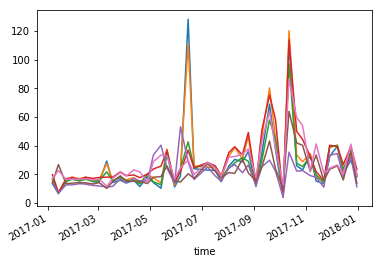

In [5]:
spee.plot(legend=False)


In [6]:
#query={'time': ('2018-02-05', '2018-02-15'),
# 'lat': (-30.595141582265763, -30.573900084400902),
# 'lon': (115.14502132590322, 115.16618234076345),
# 'output_crs': 'EPSG:3577',
# 'resampling': 'bilinear',
# 'resolution': (-25.0, 25.0)}
#sat_array2 = dc.load(product='ls8_nbar_scene', **query)
#sat_array2.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
#sat_array2

In [7]:
import DEAPlotting
#DEAPlotting.three_band_image(sat_array2, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [8]:
{'time': ('2017-01-01', '2017-12-31'),
 'lat': (-36.39749428899774, -36.37623471100226),
 'lon': (145.70748451586808, 145.72907848413193),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
data = dc.load(product='ls8_nbart_geomedian_annual', **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 88, y: 103)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01
  * y        (y) float64 -4.041e+06 -4.041e+06 -4.041e+06 -4.041e+06 ...
  * x        (x) float64 1.229e+06 1.229e+06 1.229e+06 1.229e+06 1.229e+06 ...
Data variables:
    blue     (time, y, x) int16 643 641 656 647 652 670 674 673 622 616 589 ...
    green    (time, y, x) int16 937 933 955 944 953 969 991 991 922 904 867 ...
    red      (time, y, x) int16 1308 1302 1326 1317 1330 1344 1368 1351 1240 ...
    nir      (time, y, x) int16 2273 2252 2273 2277 2314 2364 2449 2488 2396 ...
    swir1    (time, y, x) int16 3029 2990 3006 2984 3021 3084 3157 3147 2964 ...
    swir2    (time, y, x) int16 2146 2100 2100 2095 2131 2176 2239 2258 2132 ...
Attributes:
    crs:      EPSG:3577

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff281715198>)

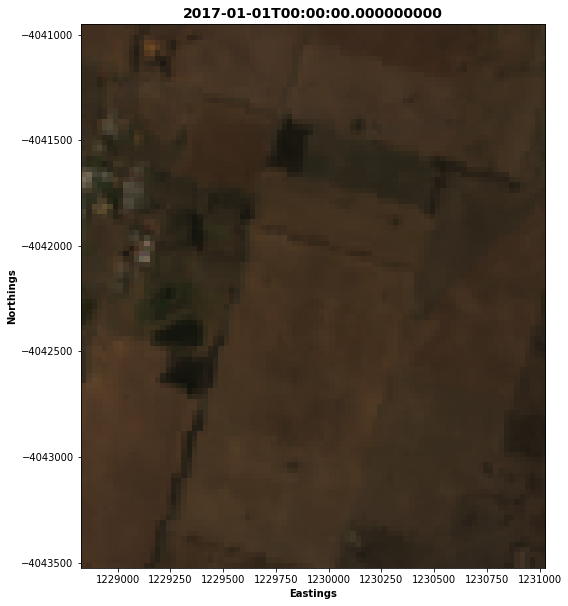

In [9]:
DEAPlotting.three_band_image(data, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [10]:
del sat_array['coastal_aerosol']

In [11]:
norm_diffo = 100*(sat_array - data.squeeze(dim='time'))/data.squeeze(dim='time')
diffo = sat_array - data.squeeze(dim='time')

In [12]:
diffo

<xarray.Dataset>
Dimensions:  (time: 45, x: 88, y: 103)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-06T00:03:15 2017-01-13T00:09:24 ...
  * y        (y) float64 -4.041e+06 -4.041e+06 -4.041e+06 -4.041e+06 ...
  * x        (x) float64 1.229e+06 1.229e+06 1.229e+06 1.229e+06 1.229e+06 ...
Data variables:
    blue     (time, y, x) int16 84 118 151 156 122 101 104 83 105 78 31 59 ...
    green    (time, y, x) int16 196 236 276 291 254 250 242 190 194 160 72 ...
    red      (time, y, x) int16 351 404 462 491 459 461 432 359 382 333 177 ...
    nir      (time, y, x) int16 459 522 604 614 578 614 554 404 308 255 141 ...
    swir1    (time, y, x) int16 318 375 428 462 415 410 398 376 450 370 122 ...
    swir2    (time, y, x) int16 125 166 197 214 166 131 135 172 279 240 87 ...

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


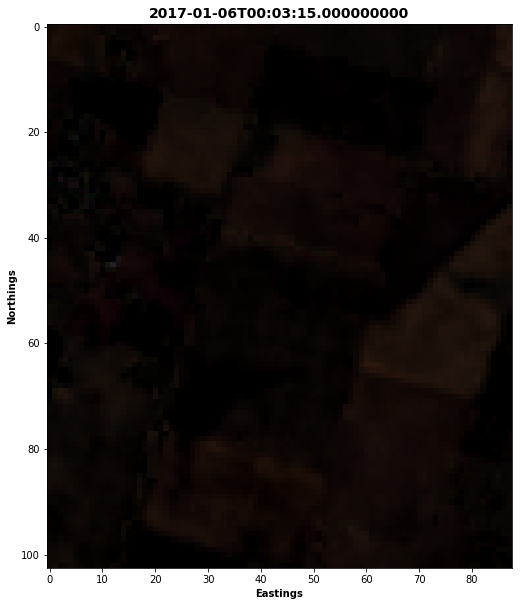

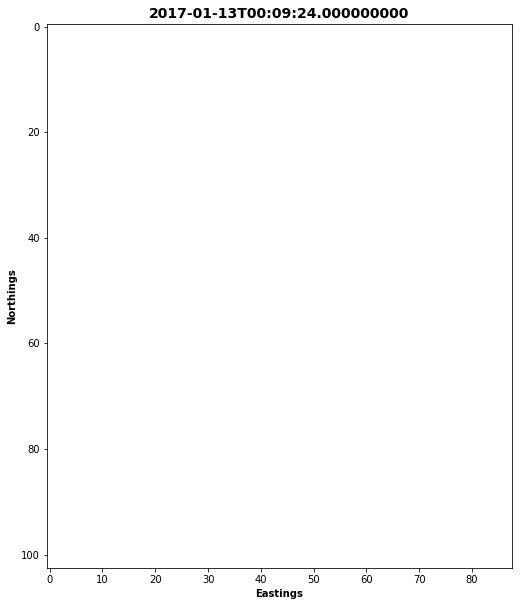

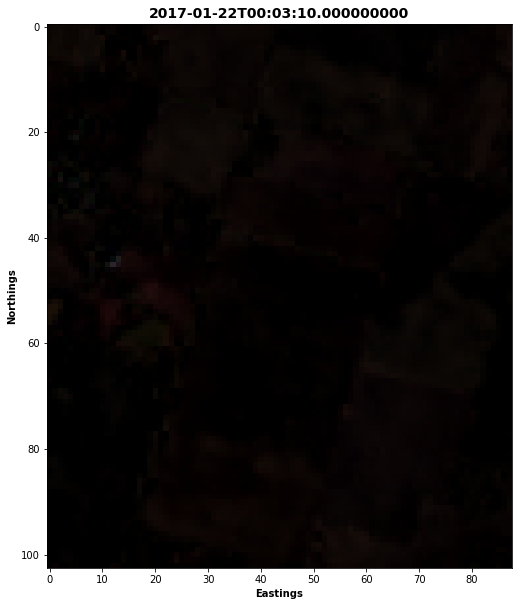

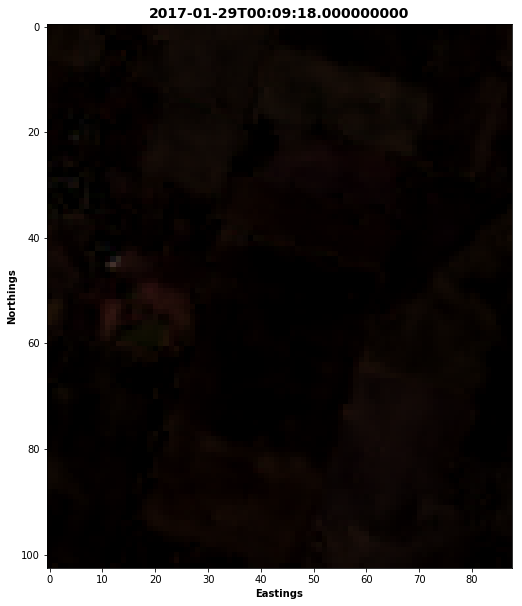

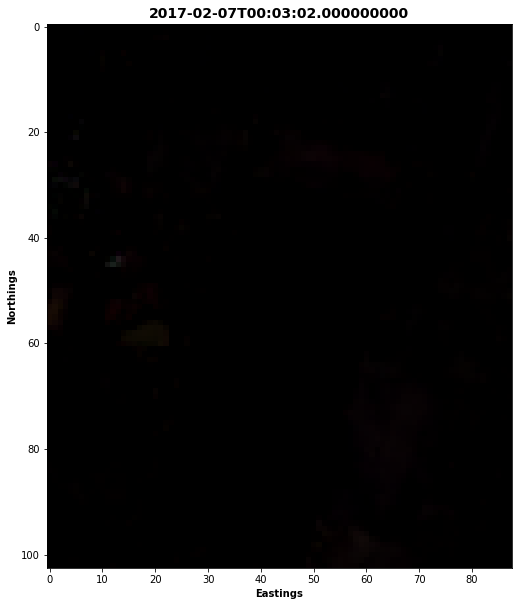

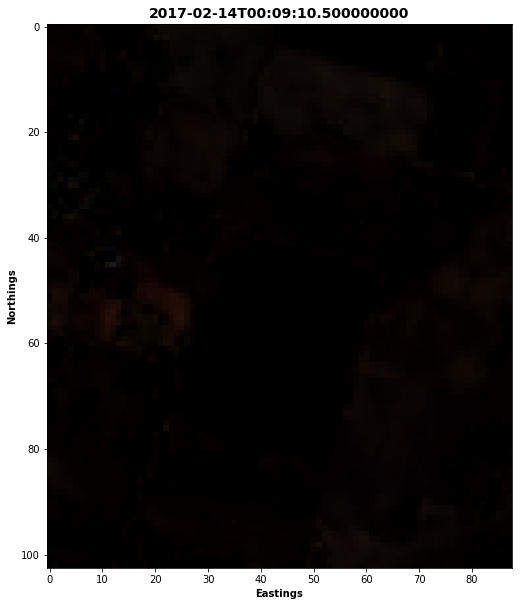

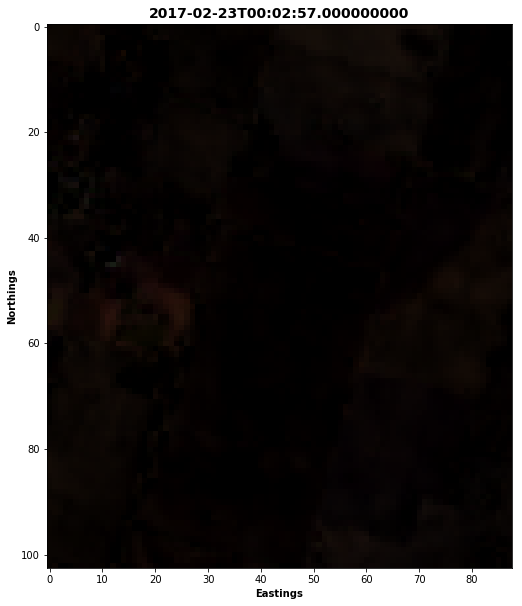

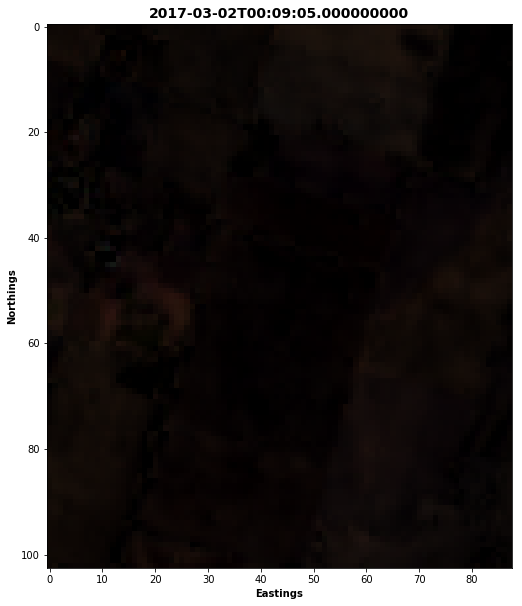

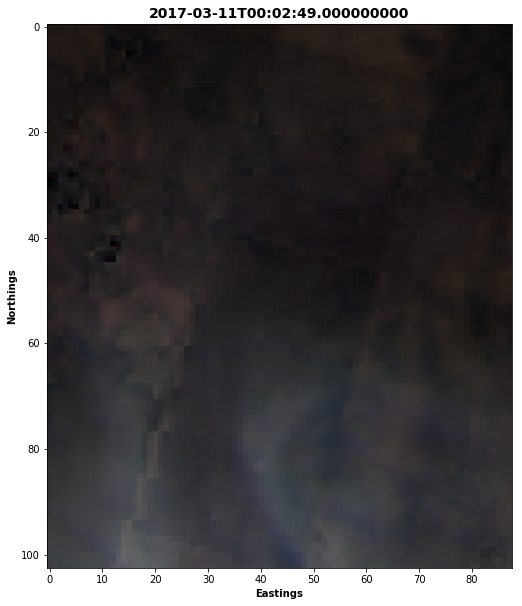

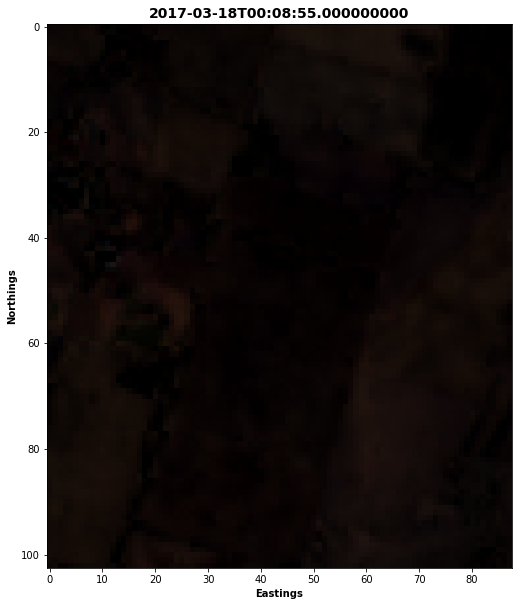

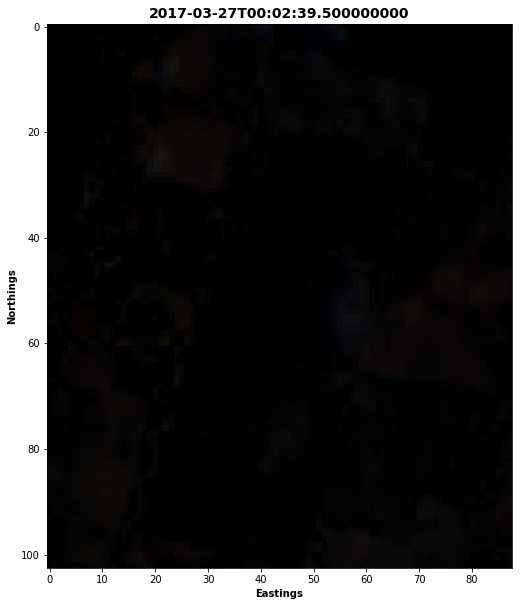

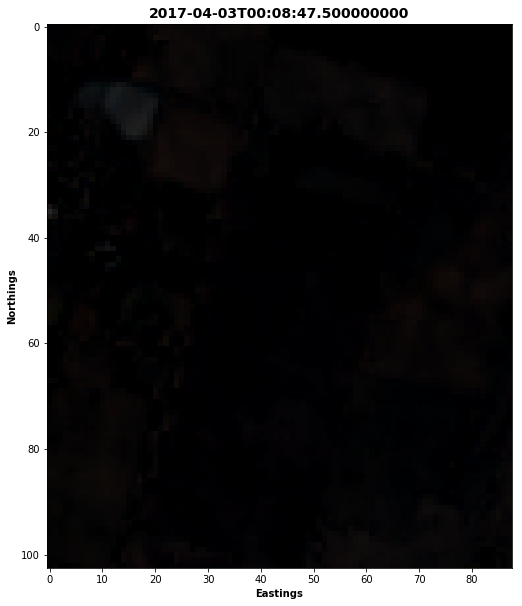

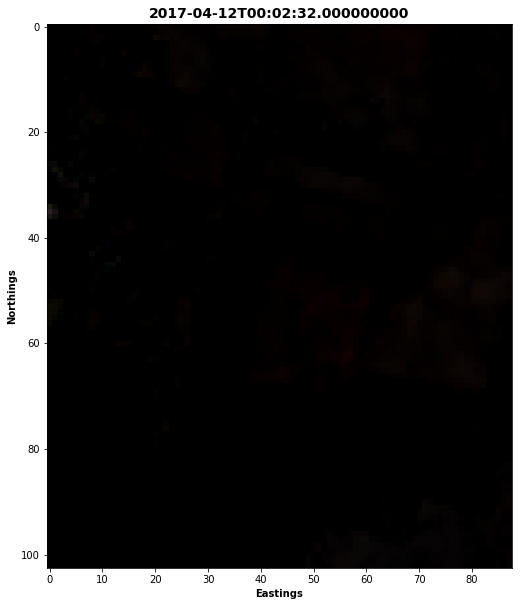

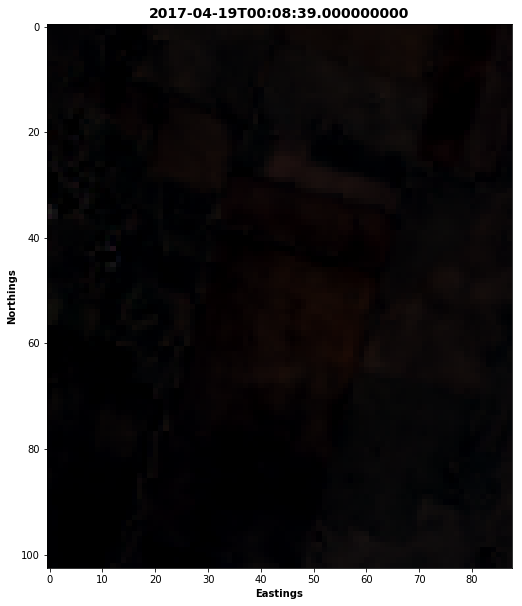

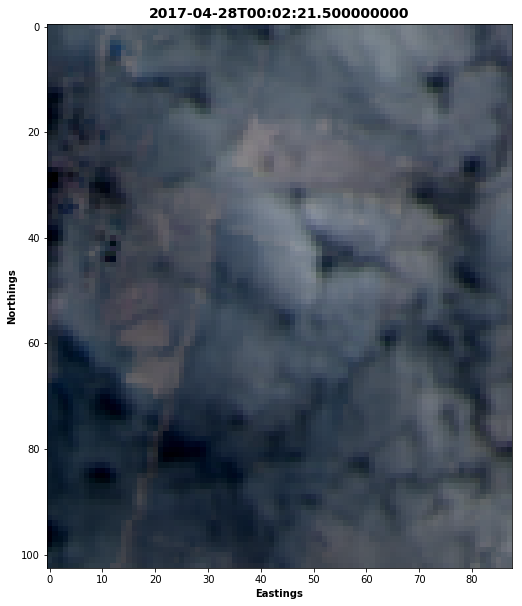

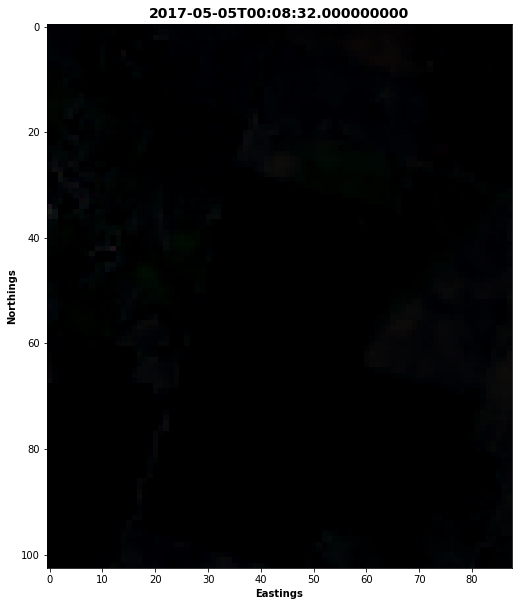

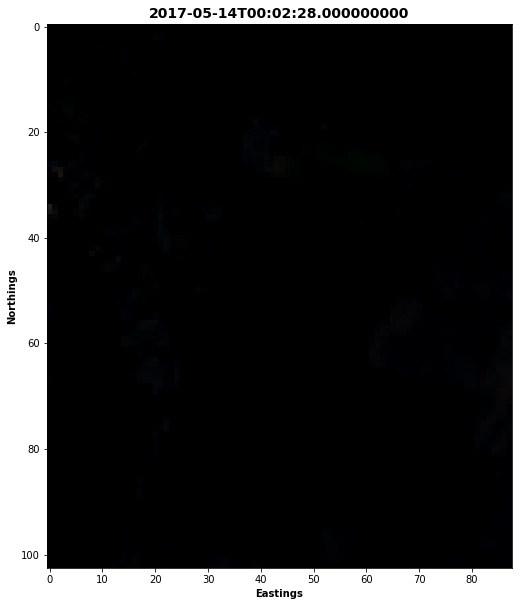

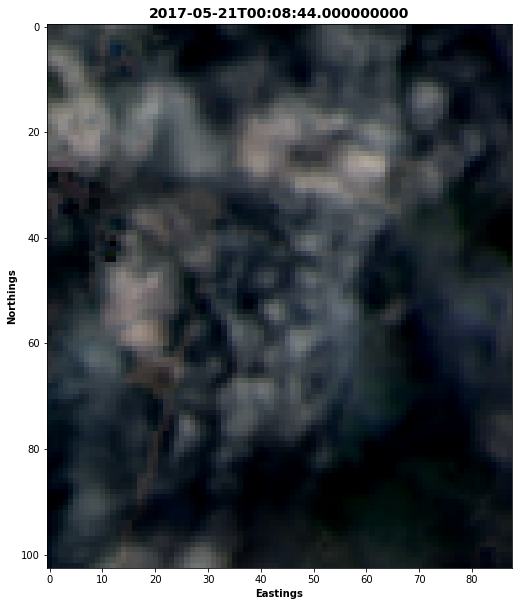

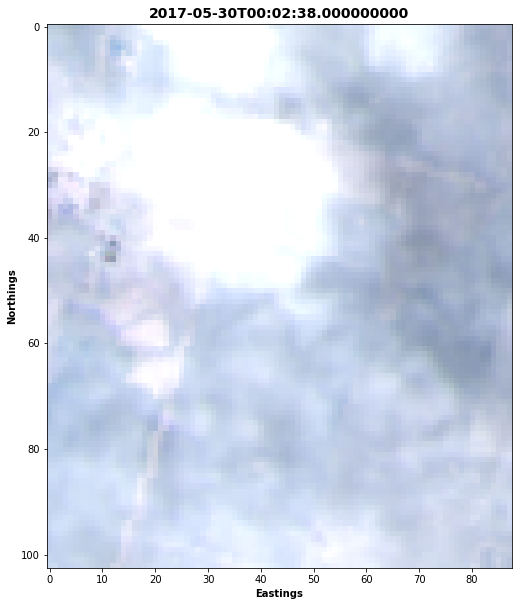

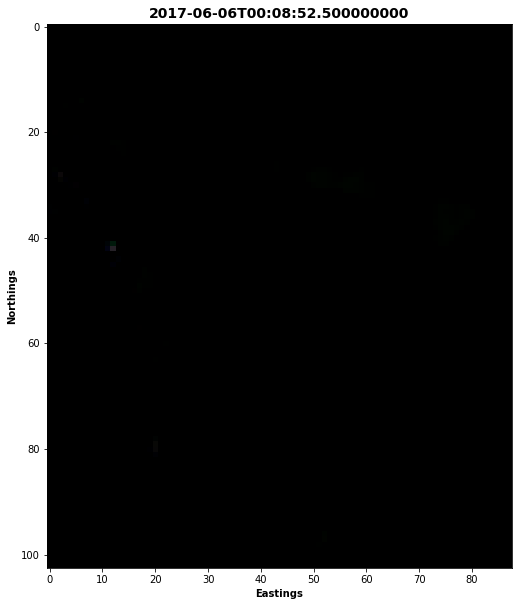

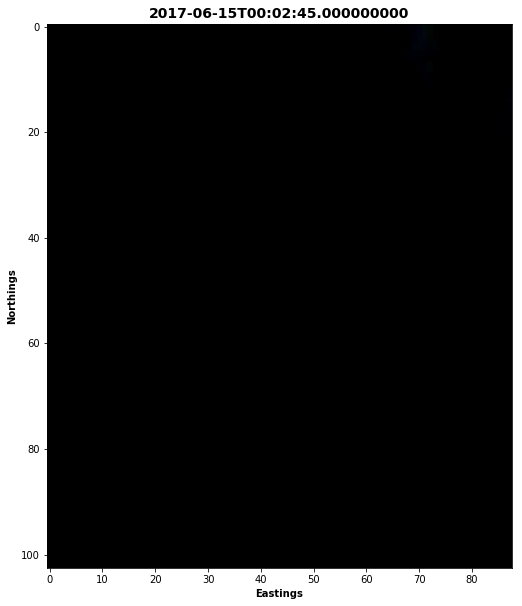

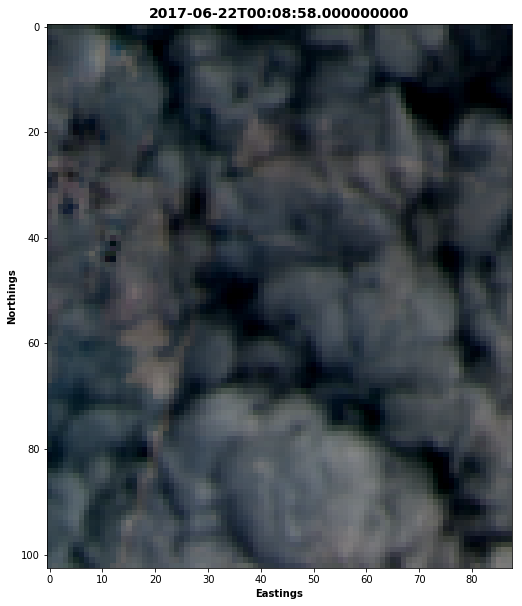

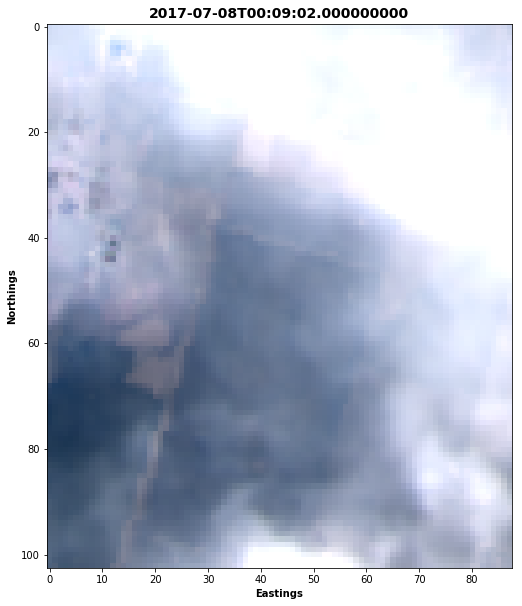

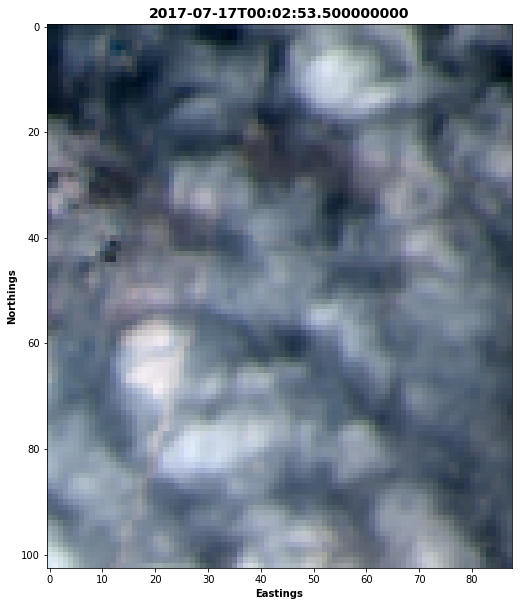

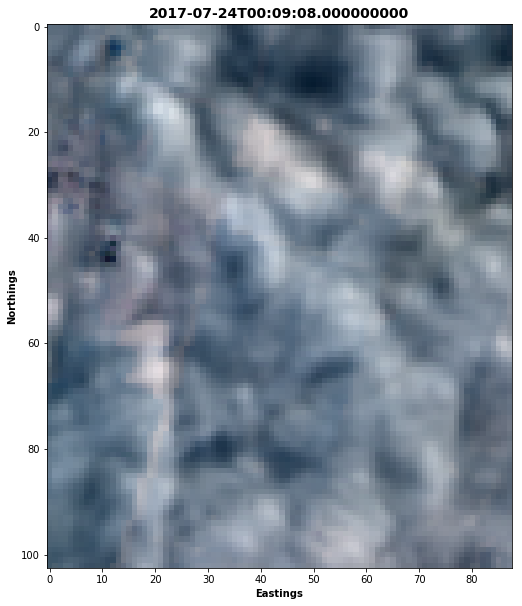

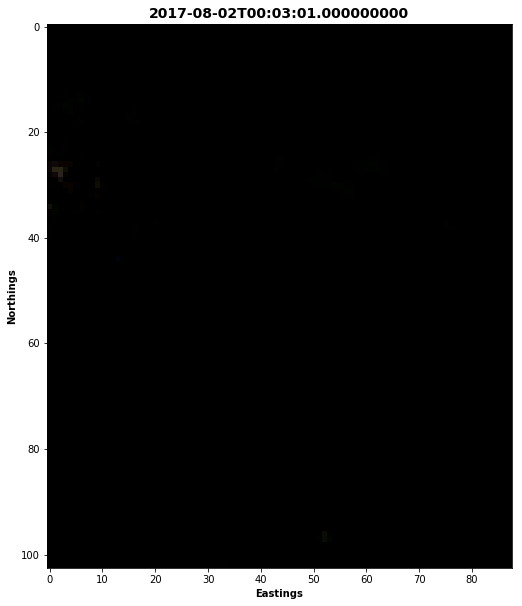

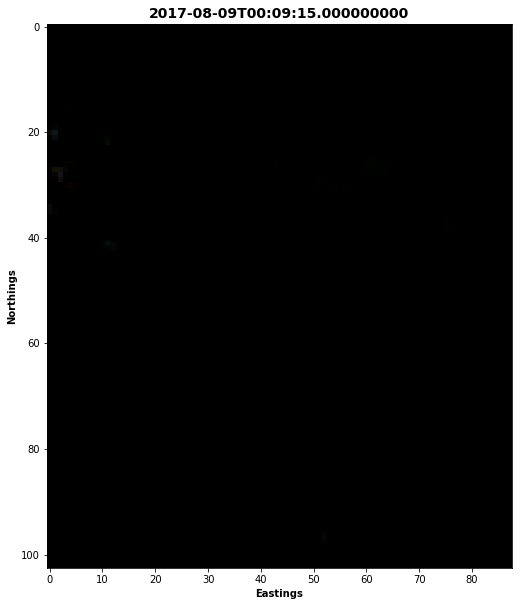

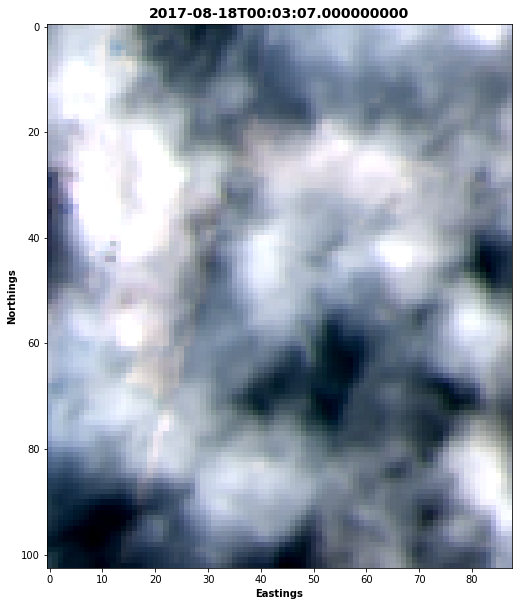

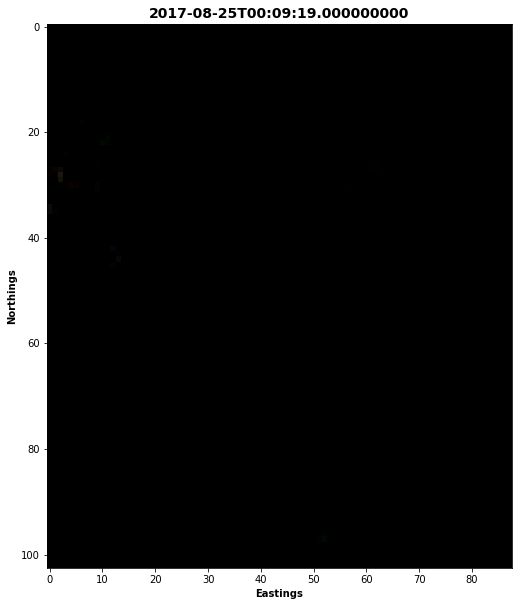

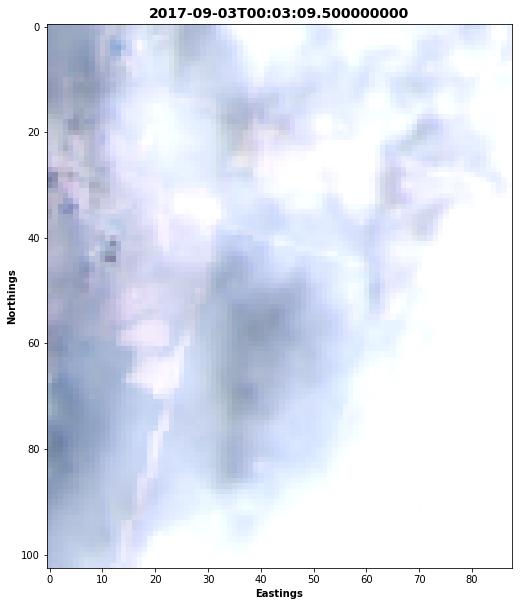

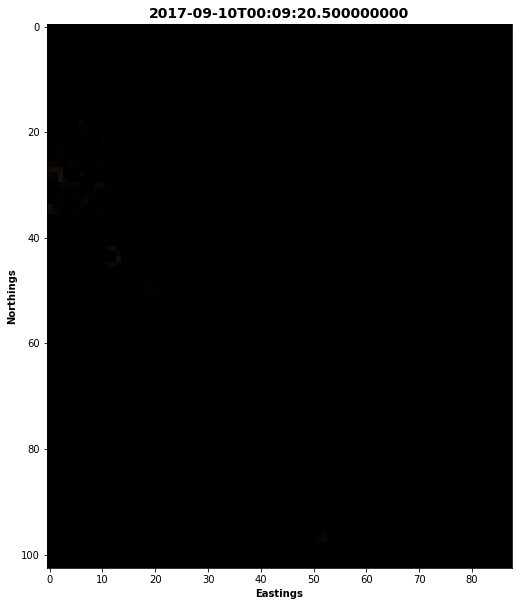

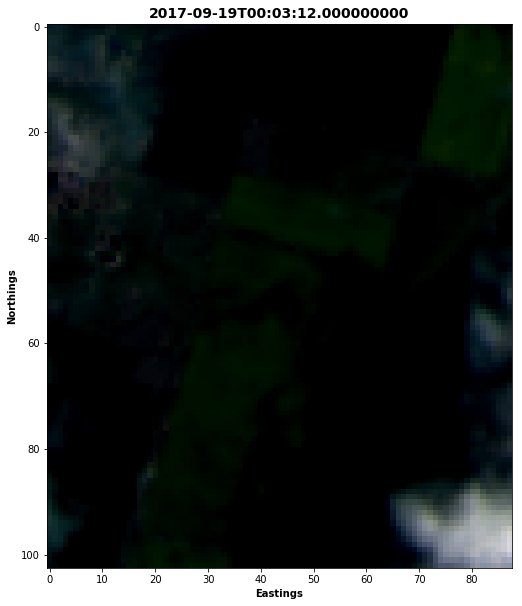

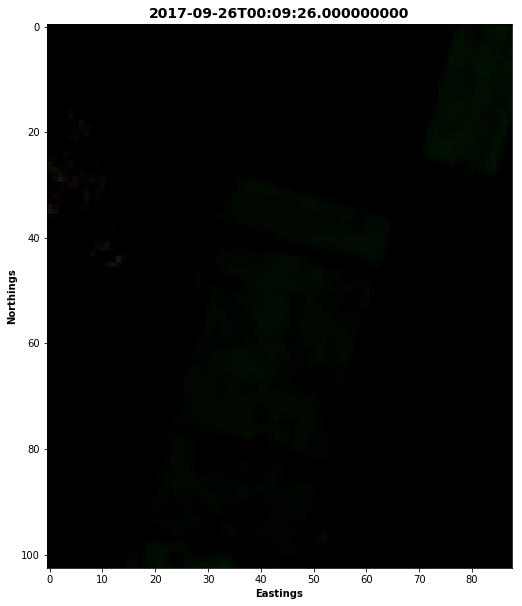

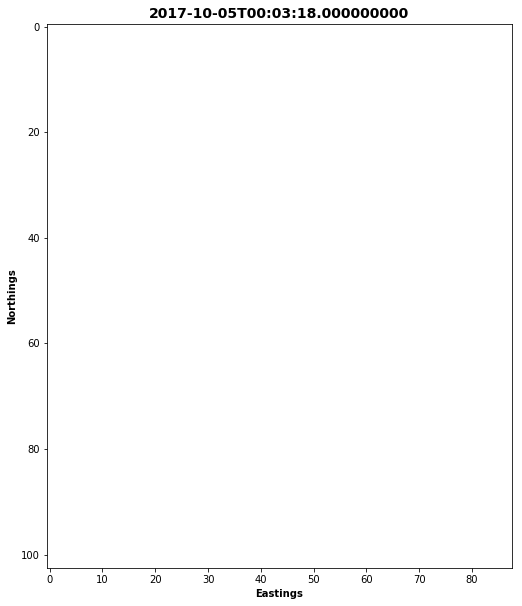

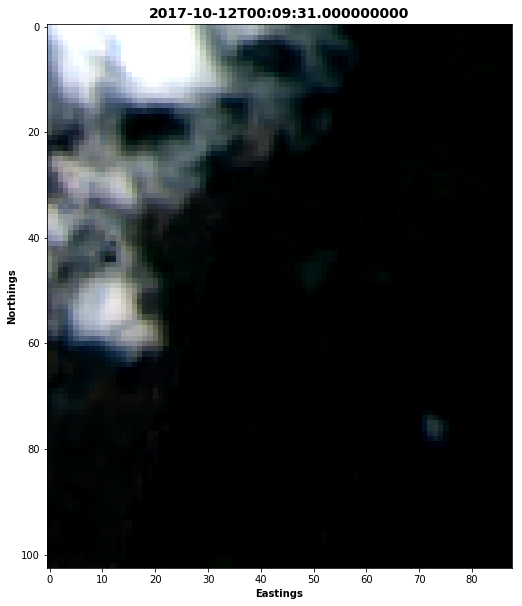

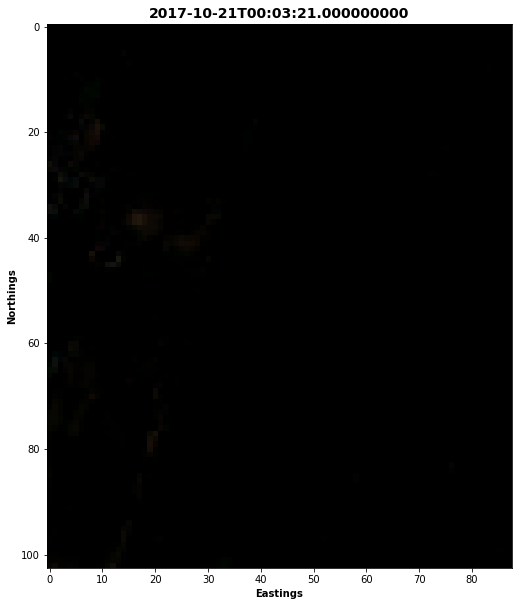

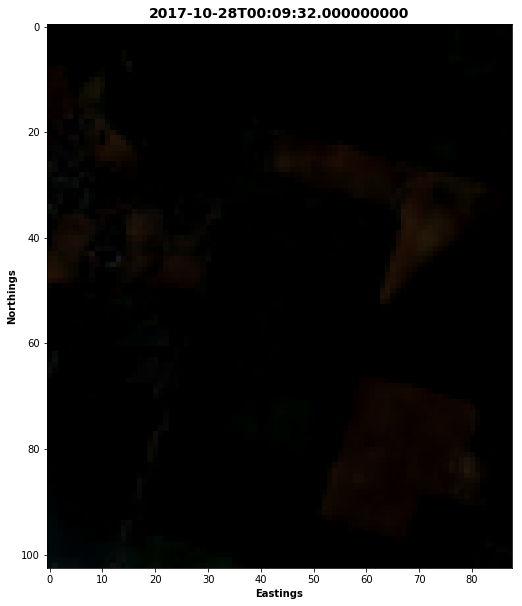

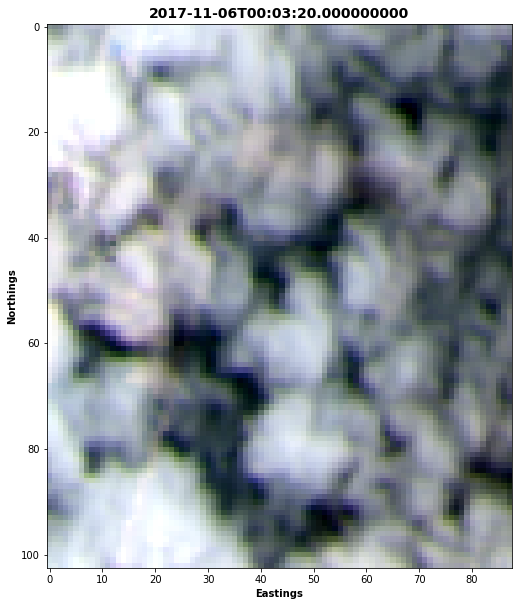

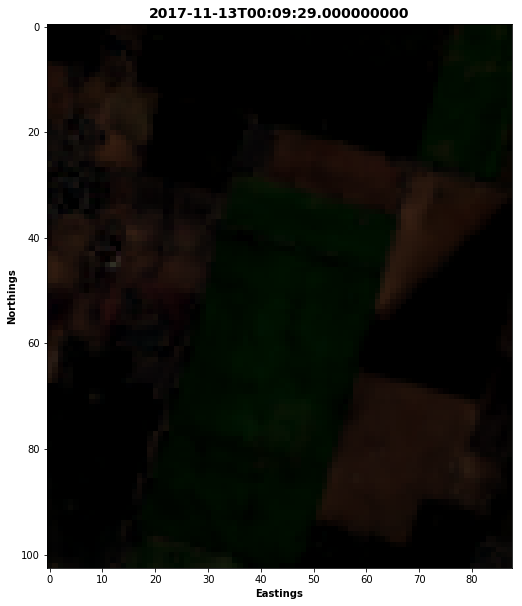

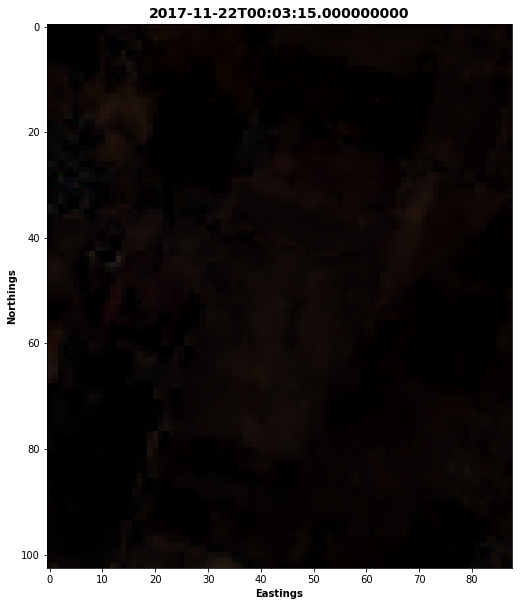

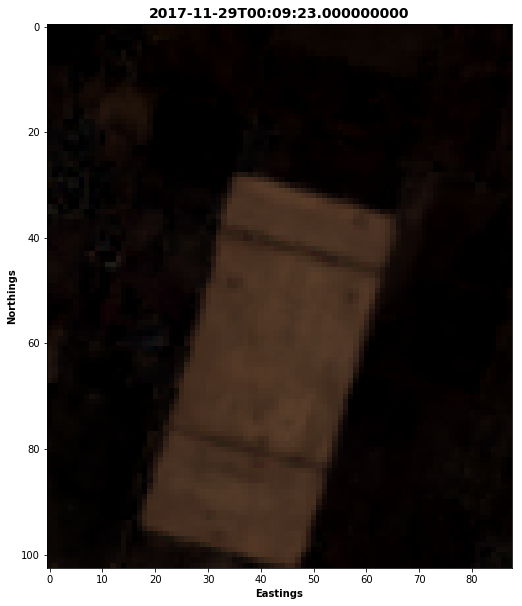

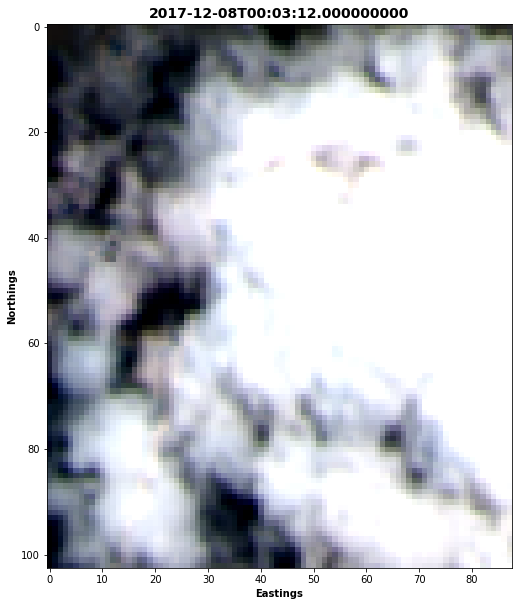

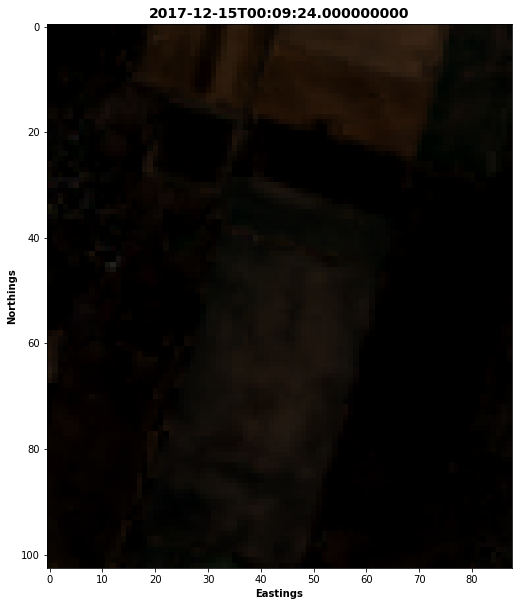

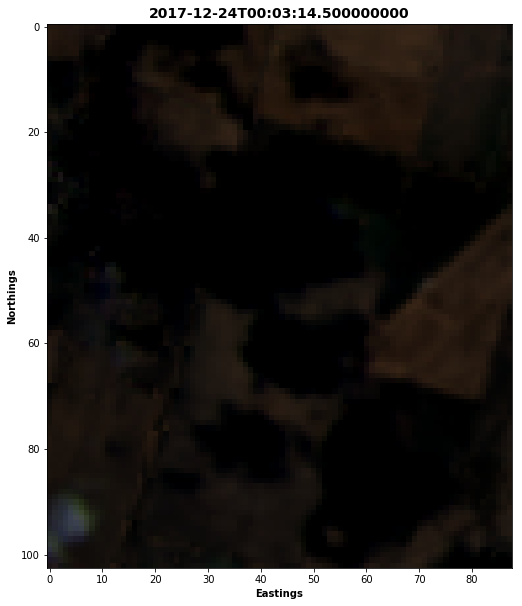

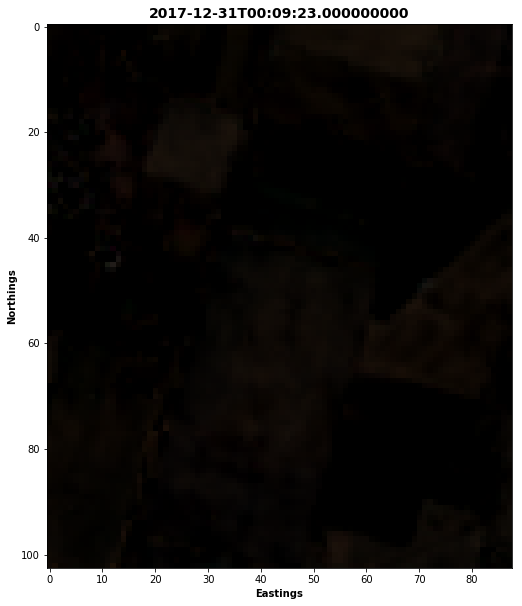

In [13]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11.5, 9.5))
#plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

for i in range(len(sat_array['time'])):
    DEAPlotting.three_band_image(diffo, bands = ['red', 'green', 'blue'], time = i, contrast_enhance=False)
